In [787]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [788]:
df_cust = pd.read_csv('datasets/customers.csv')
df_trans = pd.read_csv('datasets/transactions.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')

In [789]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [790]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [791]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [792]:
df_cust.shape

(1000, 8)

In [793]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


# Check for NULL values

In [794]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [795]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


Handle Annual Income Null Values

In [796]:
occupation_wise_inc_median = df_cust.groupby('occupation').annual_income.median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [797]:
df_cust['annual_income'] = df_cust.apply(
    lambda row: row['annual_income'] if pd.notnull(row['annual_income']) else occupation_wise_inc_median[row.occupation],
    axis=1
)

In [798]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [799]:
df_cust.iloc[[14, 82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


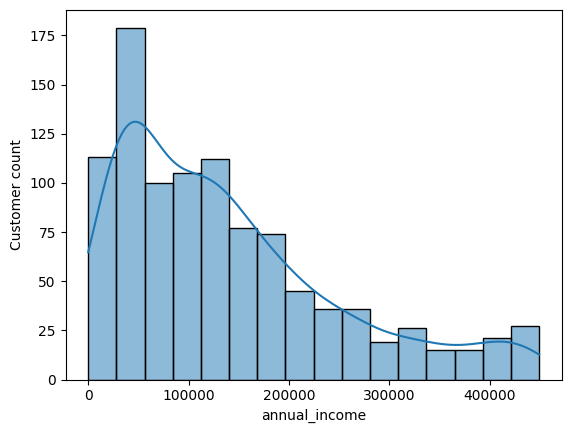

In [800]:
sns.histplot(df_cust['annual_income'], kde=True)
plt.ylabel('Customer count')
plt.show()

# Check for Outliers

In [801]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


Annual income must be >= 100

In [802]:
df_cust[df_cust['annual_income'] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [803]:
for idx, row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[idx, 'annual_income'] = occupation_wise_inc_median[row.occupation]

In [804]:
df_cust.loc[[31, 316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


In [805]:
avg_income_per_occupation = df_cust.groupby('occupation').annual_income.mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [806]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [807]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

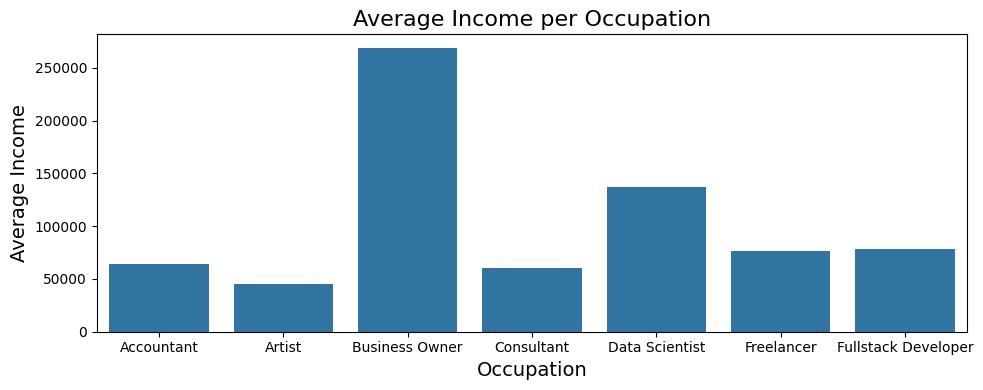

In [808]:
plt.figure(figsize=(10,4))
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values)
plt.title('Average Income per Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Average Income', fontsize=14)

plt.tight_layout()
plt.show()

# Analysing Age

In [809]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

Check for Null values.

In [810]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

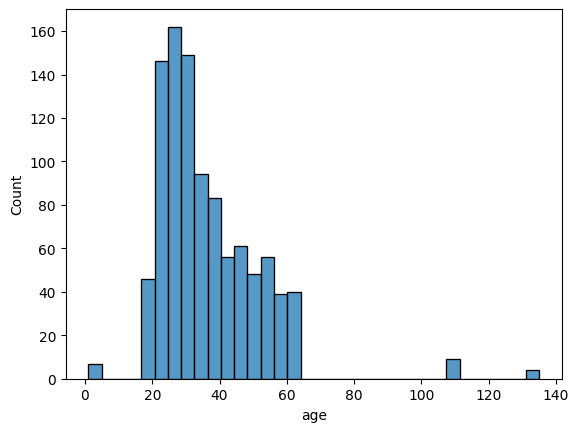

In [811]:
sns.histplot(df_cust.age)
plt.show()

In [812]:
df_cust[(df_cust.age < 15) | (df_cust.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [813]:
df_cust[df_cust['gender'] == 'Male'].age.median()

np.float64(33.0)

In [814]:
df_cust[df_cust['gender'] == 'Female'].age.median()

np.float64(32.0)

In [815]:
df_cust.age.mean()

np.float64(36.405)

In [816]:
age_median = df_cust.age.median()

In [817]:
for index, row in df_cust.iterrows():
    if (row.age < 15) or (row.age > 80):
        df_cust.at[index, 'age'] = age_median

In [818]:
df_cust[(df_cust.age < 15) | (df_cust.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [819]:
df_cust.age.describe()

count    1000.000000
mean       35.506000
std        12.192072
min        18.000000
25%        26.000000
50%        32.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

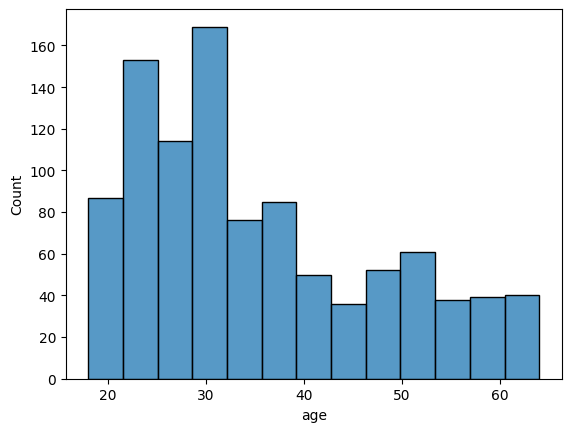

In [820]:
sns.histplot(df_cust.age)
plt.show()

# Analysis

In [821]:
def get_age_group(row):
    if 18 <= row['age'] <= 25:
        return 'Youngsters'
    elif 26 <= row['age'] <= 48:
        return 'Mid age professionals'
    elif 49 <= row['age'] <= 65:
        return 'Seniors'

In [822]:
df_cust['age_group'] = df_cust.apply(get_age_group, axis=1)

In [823]:
df_cust.head(10)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,32,City,Business Owner,358211.0,Married,Mid age professionals
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,Mid age professionals
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,Youngsters
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,Youngsters
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,Mid age professionals
5,6,Arya Das,Male,22,City,Freelancer,44887.0,Married,Youngsters
6,7,Avyanna Soni,Female,32,Suburb,Business Owner,259013.0,Married,Mid age professionals
7,8,Yash Vernekar,Male,27,City,Freelancer,159400.0,Married,Mid age professionals
8,9,Vihaan Agarwal,Male,21,Suburb,Fullstack Developer,34814.0,Single,Youngsters
9,10,Aditya Choudhary,Male,25,Rural,Freelancer,39832.0,Married,Youngsters


In [824]:
group_by_age = df_cust.groupby('age_group').age_group.count()

In [825]:
list(group_by_age.index)

['Mid age professionals', 'Seniors', 'Youngsters']

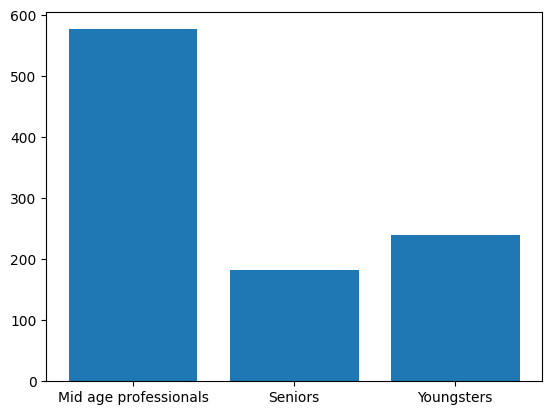

In [826]:
plt.bar(list(group_by_age.index), list(group_by_age.values))
plt.show()

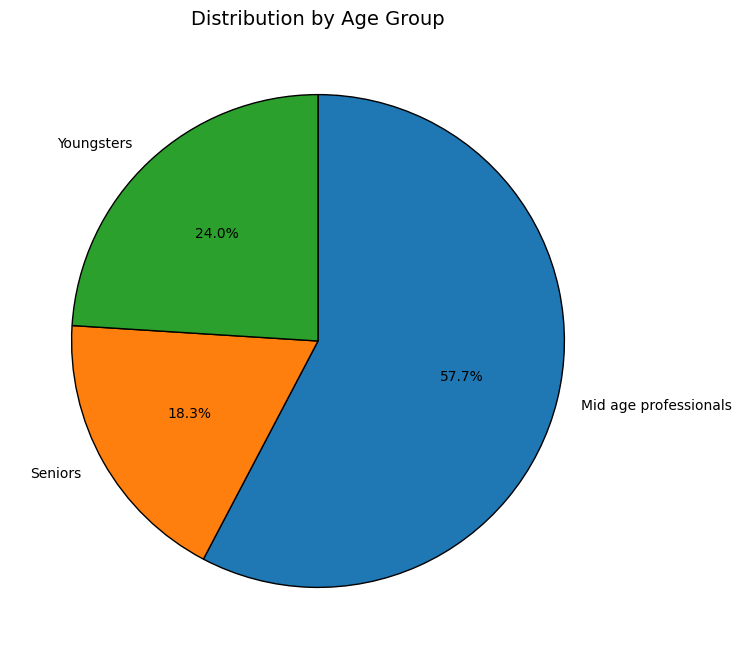

In [827]:
# Creating the pie chart
plt.figure(figsize=(8, 8))  # Set figure size for better visualization
plt.pie(
    list(group_by_age.values),
    labels=list(group_by_age.index),
    autopct='%1.1f%%',  # Simplified format to one decimal place
    startangle=90,  # Start from 90° to align better
    counterclock=False,  # Display slices in a clockwise direction
    wedgeprops={'edgecolor': 'black'}  # Add black borders for better separation
)

# Adding a title
plt.title("Distribution by Age Group", fontsize=14)

# Display the chart
plt.show()

In [828]:
group_by_location_count = df_cust.groupby(['location', 'gender']).cust_id.count()
group_by_location_count

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
Name: cust_id, dtype: int64

In [829]:
# Convert the data into a DataFrame
group_by_location = pd.Series(group_by_location_count).unstack()
group_by_location

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


<Axes: xlabel='location'>

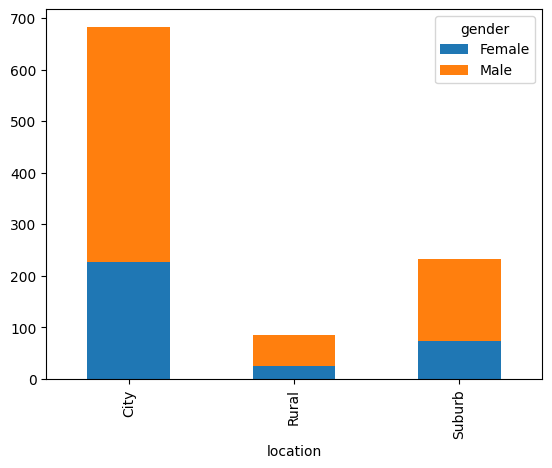

In [830]:
group_by_location.plot(kind='bar', stacked=True)

# Explore  Credit Score Table

In [831]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [832]:
df_cs.shape

(1004, 6)

In [833]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [834]:
df_cs = df_cs.drop_duplicates(subset='cust_id', keep='last')

In [835]:
df_cs.shape

(1000, 6)

In [836]:
df_cs.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

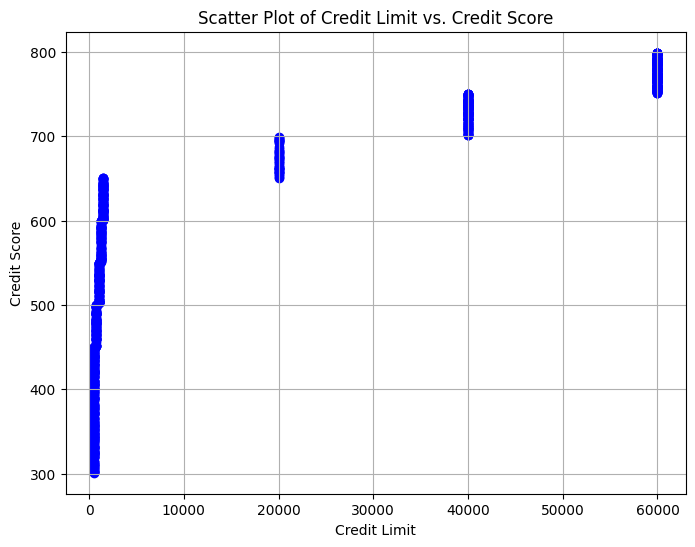

In [837]:
plt.figure(figsize=(8,6))
plt.scatter(df_cs['credit_limit'], df_cs['credit_score'], color='blue', marker='o')

# Add labels and title
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.title('Scatter Plot of Credit Limit vs. Credit Score')

# Add grid
plt.grid(True)

# Show plot
plt.show()

In [838]:
df_cs.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

In [839]:
def get_credit_range(row):
    if 300 <= row['credit_score'] <= 349:
        return '300 - 349'
    elif 350 <= row['credit_score'] <= 399:
        return '350 - 399'
    elif 400 <= row['credit_score'] <= 449:
        return '400 - 449'
    elif 450 <= row['credit_score'] <= 499:
        return '450 - 499'
    elif 500 <= row['credit_score'] <= 549:
        return '500 - 549'
    elif 550 <= row['credit_score'] <= 599:
        return '550 - 599'
    elif 600 <= row['credit_score'] <= 649:
        return '600 - 649'
    elif 650 <= row['credit_score'] <= 699:
        return '650 - 699'
    elif 700 <= row['credit_score'] <= 749:
        return '700 - 749'
    elif 750 <= row['credit_score'] <= 799:
        return '750 - 799'
    elif 800 <= row['credit_score'] <= 850:
        return '800 - 850'
    else:
        return 'Unknown'

In [840]:
df_cs['credit_score_range'] = df_cs.apply(get_credit_range, axis=1)

In [841]:
df_cs.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
850,847,400,0.248915,79.0,3.0,500.0,400 - 449
590,589,765,0.481512,22164.0,0.0,60000.0,750 - 799
463,464,591,0.398066,262.0,4.0,1250.0,550 - 599


In [842]:
credit_range_limit = df_cs.groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode()[0])

In [843]:
credit_range_limit.index

Index(['300 - 349', '350 - 399', '400 - 449', '450 - 499', '500 - 549',
       '550 - 599', '600 - 649', '650 - 699', '700 - 749', '750 - 799'],
      dtype='object', name='credit_score_range')

In [844]:
credit_range_limit.values

array([  500.,   500.,   500.,   750.,  1000.,  1250.,  1500., 20000.,
       40000., 60000.])

In [845]:
credit_limit_null_df = df_cs[df_cs.credit_limit.isnull()]

In [846]:
for index, row in credit_limit_null_df.iterrows():
    df_cs.at[index, 'credit_limit'] = credit_range_limit[row['credit_score_range']]

In [847]:
df_cs.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [848]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


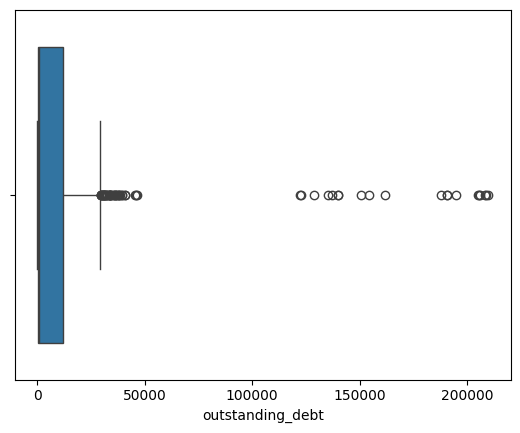

In [849]:
sns.boxplot(x=df_cs['outstanding_debt'])
plt.show()

In [850]:
df_cs[df_cs['outstanding_debt'] > df_cs['credit_limit']]['outstanding_debt'] 

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
545    135112.0
639    140063.0
649    128818.0
702    190717.0
727    140008.0
729    205404.0
734    209901.0
770    195004.0
866    208406.0
Name: outstanding_debt, dtype: float64

In [851]:
df_cs.loc[(df_cs['outstanding_debt'] > df_cs['credit_limit']), 'outstanding_debt'] = df_cs['credit_limit']

In [852]:
df_cs[df_cs['outstanding_debt'] > df_cs['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [853]:
df_merged = df_cs.merge(df_cust, on='cust_id', how='inner')

In [854]:
df_merged.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,749,0.585171,19571.0,0.0,40000.0,700 - 749,Manya Acharya,Female,32,City,Business Owner,358211.0,Married,Mid age professionals
1,2,587,0.107928,1250.0,2.0,1250.0,550 - 599,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,Mid age professionals
2,3,544,0.854807,513.0,4.0,1000.0,500 - 549,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,Youngsters
3,4,504,0.336938,224.0,2.0,1000.0,500 - 549,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,Youngsters
4,5,708,0.586151,18090.0,2.0,40000.0,700 - 749,Advait Malik,Male,48,City,Consultant,39406.0,Married,Mid age professionals


In [855]:
corr_matrix = df_merged[['credit_limit', 'credit_score', 'annual_income', 'outstanding_debt']].corr()

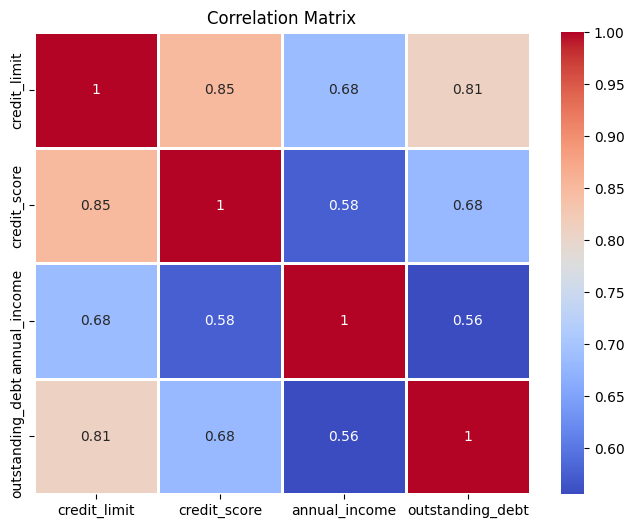

In [856]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [857]:
df_trans = pd.read_csv('datasets/transactions.csv')

# Transactions Table

In [858]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [859]:
df_trans.shape

(500000, 7)

In [860]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [861]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [862]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [863]:
product_categories = df_trans.product_category.unique().tolist()

In [864]:
product_categories_platform = {}

for category in product_categories:
    product_categories_platform[category] = df_trans[df_trans['product_category'] == category].platform.mode()[0]

In [865]:
product_categories_platform

{'Electronics': 'Amazon',
 'Fashion & Apparel': 'Amazon',
 'Sports': 'Amazon',
 'Kitchen Appliances': 'Amazon',
 'Beauty & Personal Care': 'Amazon',
 'Garden & Outdoor': 'Amazon',
 'Books': 'Amazon',
 'Home Decor': 'Amazon',
 'Toys & Games': 'Amazon'}

In [866]:
platform_null_rows = df_trans[df_trans.platform.isnull()]
platform_null_rows.shape

(4941, 7)

In [867]:
for idx, row in platform_null_rows.iterrows():
    df_trans.at[idx, 'platform'] = product_categories_platform[row.product_category]

In [868]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [869]:
df_trans.tran_amount.describe()

count    500000.00000
mean       3225.20733
std       13098.74276
min           0.00000
25%          64.00000
50%         141.00000
75%         397.00000
max       69999.00000
Name: tran_amount, dtype: float64

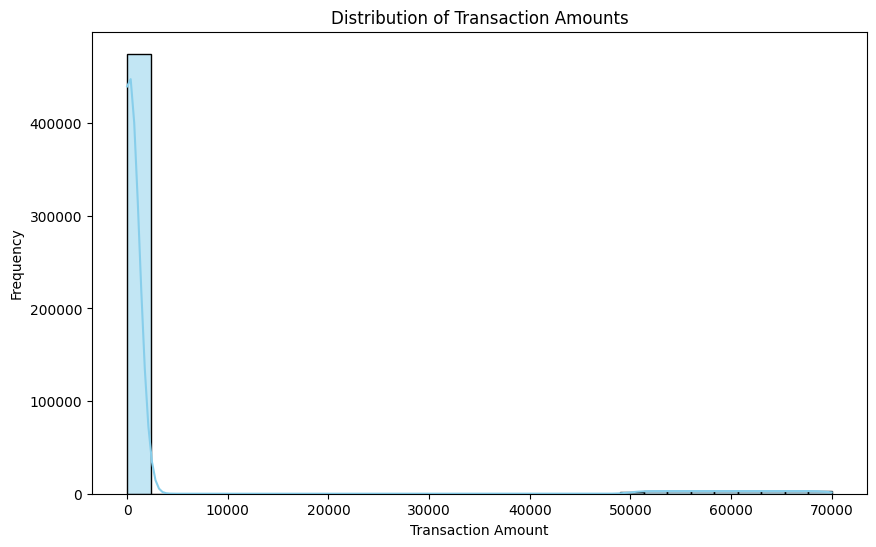

In [870]:
# Create a histogram with a KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(df_trans.tran_amount, kde=True, color='skyblue', bins=30)

# Add labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')

# Show the plot
plt.show()


In [871]:
trans_zero = df_trans[df_trans.tran_amount == 0]

In [872]:
trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [873]:
trans_zero[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [874]:
median = trans_normal[(trans_normal['platform'] == 'Amazon') & (trans_normal['product_category']=='Electronics') & (trans_normal['payment_type']=='Credit Card')].groupby('product_category').tran_amount.median()

In [875]:
median = median['Electronics']

In [876]:
for idx, row in trans_zero.iterrows():
    df_trans.at[idx, 'tran_amount'] = median

In [877]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [878]:
Q1, Q3 = df_trans.tran_amount.quantile([0.25, 0.75])
IQR = Q3 - Q1

In [879]:
IQR

347.0

In [880]:
lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

In [881]:
df_trans_outlier = df_trans[df_trans.tran_amount > upper]

In [882]:
df_trans_outlier.shape

(25000, 7)

In [883]:
upper

1107.0

In [884]:
trans_normal = df_trans[df_trans.tran_amount < upper]

In [885]:
trans_normal_product_category_amount = trans_normal.groupby('product_category').tran_amount.mean()
trans_normal_product_category_amount

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [886]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [887]:
def get_tran_amount(row):
    if row['tran_amount'] > upper:
        return trans_normal_product_category_amount[row.product_category]
    return row['tran_amount']

In [888]:
df_trans['tran_amount'] = df_trans.apply(get_tran_amount, axis=1)

In [889]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


In [890]:
df_trans.loc[[26,49,94,104]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay


In [891]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


In [898]:
df_merged_2 = pd.merge(df_merged, df_trans, how='inner', on='cust_id')

In [899]:
df_merged_2.shape

(500000, 21)

<Axes: xlabel='age_group', ylabel='count'>

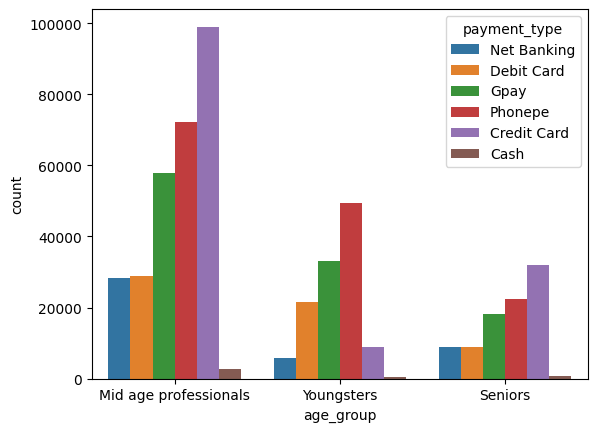

In [902]:
sns.countplot(x=df_merged_2['age_group'], hue=df_merged_2['payment_type'])